<a href="https://colab.research.google.com/github/ioahKwon/Machine-Learning-Deep-Learning/blob/master/%5B%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EA%B3%BC%EB%94%A5%EB%9F%AC%EB%8B%9D%5D_Week_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[머신러닝과딥러닝] 수업 정리 Week #7**

### _2020.08._ SKKU Lecture Summary by IOAH



### 1. KNN 분류기를 이용한 MNIST 데이터 분류

KNN 분류 모형의 학습을 위하여 MNIST 데이터를 불러온다. Data와 target을 각각 X,Y에 저장해두고 Training set의 순서를 shuffling으로 섞어준다.

In [ ]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

C:\ProgramData\Anaconda3\envs\handson\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\envs\handson\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [ ]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [ ]:
y.shape

(70000,)

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
X_test.shape

(10000, 784)

In [ ]:
#Training set 순서 섞기 (shuffling)
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [ ]:
shuffle_index

array([46203, 26510, 36046, ..., 32543, 42987, 52998])

> 하지만 Mnist 데이터가 업데이트 이후 위의 방법처럼 바로 불러오기가 안될것이다. 그래서 다른 방식으로 수정해서 데이터를 불러왔다. 방법은 밑에 코딩을 참조하자ㅎㅎ(코딩 다시 불러오는게 귀찮아서 이미지로 대체한 것은 비밀...)



In [1]:
from google.colab import files
uploaded = files.upload() # 파일 업로드 기능 실행

for fn in uploaded.keys(): # 업로드된 파일 정보 출력
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))

Saving 1.JPG to 1.JPG
User uploaded file "1.JPG" with length 63791 bytes


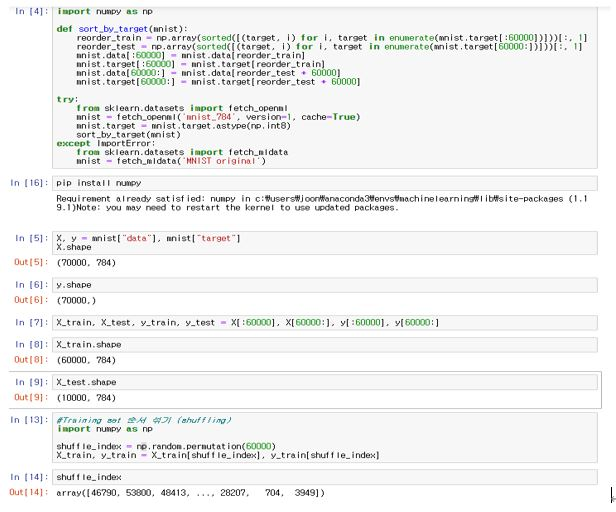

In [2]:
from IPython.display import Image
Image('1.JPG')

그후 KNN Classifier를 통해 모델을 학습하고 예측값을 구한 후 accuracy를 구한다. 0.97이라는 높은 accuracy를 보임을 확인할 수 있다. K는 4개로 설정하였다.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=4)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
           weights='distance')

In [ ]:
y_knn_pred = knn_clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_knn_pred)

0.9714

### 2. Ensemble 모형을 이용한 make_moons 및 iris 데이터 분류

다음은 Ensemble 모형을 이용한 make_moons 및 iris 데이터 분류를 해보도록 하겠다. 학습을 위해서 scikit-learn의 make_moons 데이터를 불러온다. Make_moons 함수는 두 개의 초승달 모양의 클러스터를 이루는 데이터를 생성하는데 이떄 이렇게 만들어진 데이터는 직선을 사용하여 분류할 수 없다. 데이터를 출력해서 보면 아래와 같다.

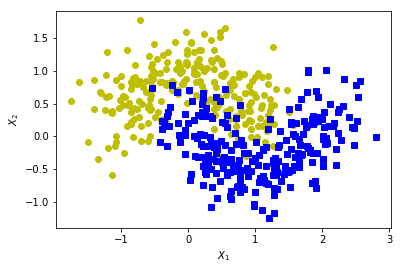

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

먼저 Bagging ensemble을 먼저 실습해보자. Decision Tree 모형을 베이스 모형으로 하여 ‘n_estimators' 매개변수를 통해 몇 개의 Decision Tree 모형을 앙상블에 참여시킬지 결정한다. 이번 실습에서는 500개의 Decision Tree 모형을 학습시켜 앙상블 하였다. 학습 결과는 아래와 같다.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.904


In [ ]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.856


결과를 보면 Bagging Ensemble을 이용할 경우 약 90.4%의 Accuracy를 가지며 단일 Decision Tree의 결과인 85.6%보다 약 5% 가량의 성능 향상이 있음을 확인했다. 또한 시각적으로 어떻게 이 classifier가 분류하는지 알아보기 위해 Decision boundary를 그리는 함수를 정의하고 각각의 Decision boundary결과를 visualizing한다.

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

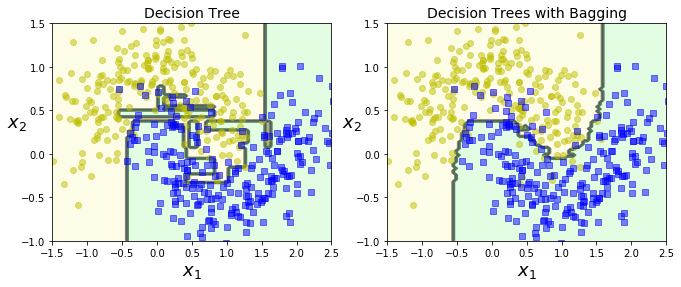

In [ ]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.subplot(122)
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.show()

이를 통해 Bagging Ensemble이 단일 Decision Tree보다 Overfitting을 방지하고 더 안정적인 결과를 출력함을 알 수 있다. 그 다음은 Adaboost classifier을 적용해보도록 하겠다. 이번에는 Decision Tree 200개를 쌓아 앙상블을 구성한다. 또한 이 classifier도 위 처럼 decision boundary를 확인해보도록 하자.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.5, n_estimators=200, random_state=42)

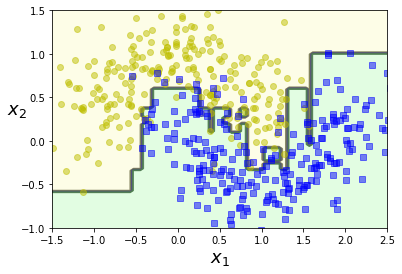

In [ ]:
plot_decision_boundary(ada_clf, X, y)

마지막으로 Bagging Ensemble 모델의 한 종류인 Random Forest를 보도록 하겠다. 모든 조건은 Bagging Ensemble 모형과 같은 조건에서 학습시켰다. 결과는 아래와 같다.

In [ ]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16, random_state=42),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=42)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred))

0.92


In [ ]:
print(accuracy_score(y_test, y_pred_rf))

0.912


In [ ]:
np.sum(y_pred == y_pred_rf) / len(y_pred)

0.976

Bagging ensemble 모델은 92%의 accuracy를 randomforest 모델은 0.912%의 accuracy를 보이는 것을 확인하였으며 서로 유사도가 97.6% 비율을 보이는 것을 확인했다.

Random Forest는 변수 중요도까지 도출이 가능한데 이는 iris 데이터를 이용해서 결과를 도출해보았다. RandomForest classifier를 500개를 쌓아서 iris 데이터로 학습시킨 뒤 feature의 중요도를 출력해보니 아래와 같은 결과를 보였다. 즉 classify에 유용한 두 feature를 고르라고 한다면 petal length와 petal width가 가장 중요하다는 것이다.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.11249225099876374
sepal width (cm) 0.023119288282510326
petal length (cm) 0.44103046436395765
petal width (cm) 0.4233579963547681


In [ ]:
rnd_clf.feature_importances_

array([0.11249225, 0.02311929, 0.44103046, 0.423358  ])